# <center> Trabalho 04 - Introdução ao Processamento de Imagem Digital </center>

**Aluno(a):** Marianna de Pinho Severo <br>
**RA:** 264960 <br>
**Professor:** Hélio Pedrini

### Passo 01: Importar bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd

#### PBM
http://netpbm.sourceforge.net/doc/pbm.html

#### Morphological operations
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html

#### Connected components
https://stackoverflow.com/questions/46441893/connected-component-labeling-in-python

### Passo 02: Definir funções auxiliares

In [2]:
def print_image(image, color=0):
    
    plt.figure(figsize=(10,10))
    
    if not color:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)

In [3]:
def plotAllImages(images):
    columns = 3
    rows = 2
    i = 1
    fig=plt.figure(figsize=(50, 50))

    for key in images.keys():
        fig.add_subplot(rows, columns, i)
        plt.xlabel(str(key))
        plt.imshow(images[key], cmap = 'gray')
        i = i+1

    plt.subplots_adjust(bottom=0.5, top=0.75)
    plt.show()

In [4]:
def imshow_components(labels): #Refereciar stack overflow
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    
    print_image(labeled_img)
#     cv.imshow('labeled.png', labeled_img)
#     cv.waitKey()

In [36]:
def imshow_components_rectagles(labels, stats): #Refereciar stack overflow
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    
    for stat in stats:
        cv.rectangle(labeled_img, (stat[0], stat[1]), (stat[0]+stat[2], stat[1]+stat[3]), (255, 255, 255), 3) 
    
    
    print_image(labeled_img)
#     cv.imshow('labeled.png', labeled_img)
#     cv.waitKey()

In [6]:
def getBlackPixelsRate(image,stat,color=1): #Black is considered 1 and White is considered 0
    init_x = stat[0]
    init_y = stat[1]
    dx = stat[2]
    dy = stat[3]
    
    area = (dx)*(dy)
    
    aux_image = image[init_y: init_y+dy,init_x:init_x + dx]
    aux_image = aux_image[aux_image == color]
    
    return len(aux_image)/area, len(aux_image), area

In [7]:
def getTransitionsRate(image, stat, total_black): #Black is 1 and White is 0
    
    if total_black == 0:
        return 0,0,0,0
    
    init_x = stat[0]
    init_y = stat[1]
    dx = stat[2]
    dy = stat[3]
    
    hor_count = 0
    ver_count = 0
    
    max_y = init_y+dy
    max_x = init_x+dx
    
    for line in range(init_y, max_y):
        for col in range(init_x, max_x):
            north = line - 1
            south = line + 1
            west = col - 1
            east = col + 1
            
            #left neighbor
            if west >= 0 and (image[line, col] == 0 and image[line,west] == 1):
                hor_count+=1
                
            # right neighbor
            if east < max_x and (image[line, col] == 0 and image[line,east] == 1):
                hor_count+=1
                
            #top neighbor
            if north >= 0 and (image[line,col] == 0 and image[north, col] == 1):
                ver_count+=1
                
            #bottom neighbor
            if south < max_y and (image[line,col] == 0 and image[south, col] == 1):
                ver_count+=1
            
    return (hor_count + ver_count)/total_black, hor_count, ver_count,total_black

### Passo 03: Ler imagem

A imagem que vamos usar neste projeto é do tipo *Portable Bitmap* (PBM). Dessa maneira, esperamos que os pixels do objeto (pixels pretos) sejam representados por valores iguais a 1 e os pixels do fundo (brancos) por valores iguais a 0.

Quando lemos essa imagem utilizando o método **imread** do *opencv*, a imagem é lida no formato monocromático, o que significa que seus valores poderão apresentar valores no intervalo de 0 a 255. Como na imagem lida só existem dois valores diferentes de pixels (0 e 255) e os valores 0 são atribuídos aos objetos, enquanto os valores 255 são atribuídos ao fundo, faremos a negação dessa imagem e dividiremos as intensidades de seus pixels por 255, de maneira a obtermos um arranjo de pixels como o esperado para uma imagem do tipo PBM. 

In [8]:
image = cv.imread('input_images/bitmap.pbm',0)
image = cv.bitwise_not(image)//255
image.shape

(1374, 2233)

### Passo 04: Criar elementos estruturantes

#### a) Elemento estruturante de 1 x 100

In [9]:
kernel1_100 = np.ones((1,100),np.uint8)
kernel1_100

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

#### b) Elemento estruturante de 200 x 1

In [10]:
kernel200_1 = np.ones((200,1), np.uint8)

#### c) Elemento estruturante de 1 x 30

In [11]:
kernel1_30 = np.ones((1,30), np.uint8)
kernel1_30

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

### Passo 05: Aplicar etapas indicadas na descrição do trabalho

In [13]:
dilated_k100 = {}
dilated_k100[0] = np.copy(image)

dilated_k200 = {} 
dilated_k200[0] = np.copy(image)

eroded_k100 = {}
eroded_k100[0] = np.copy(image)

eroded_k200 = {}
eroded_k200[0] = np.copy(image)

intesect_images = {}
intesect_images[0] = np.copy(image)

closed_k30 = {}
closed_k30[0] = np.copy(image)
connected_components = {}

In [14]:
iterations = list(range(1,6))

In [15]:
for ite in iterations:
    dilated_k100[ite] = cv.dilate(np.copy(image),kernel1_100,iterations = ite)

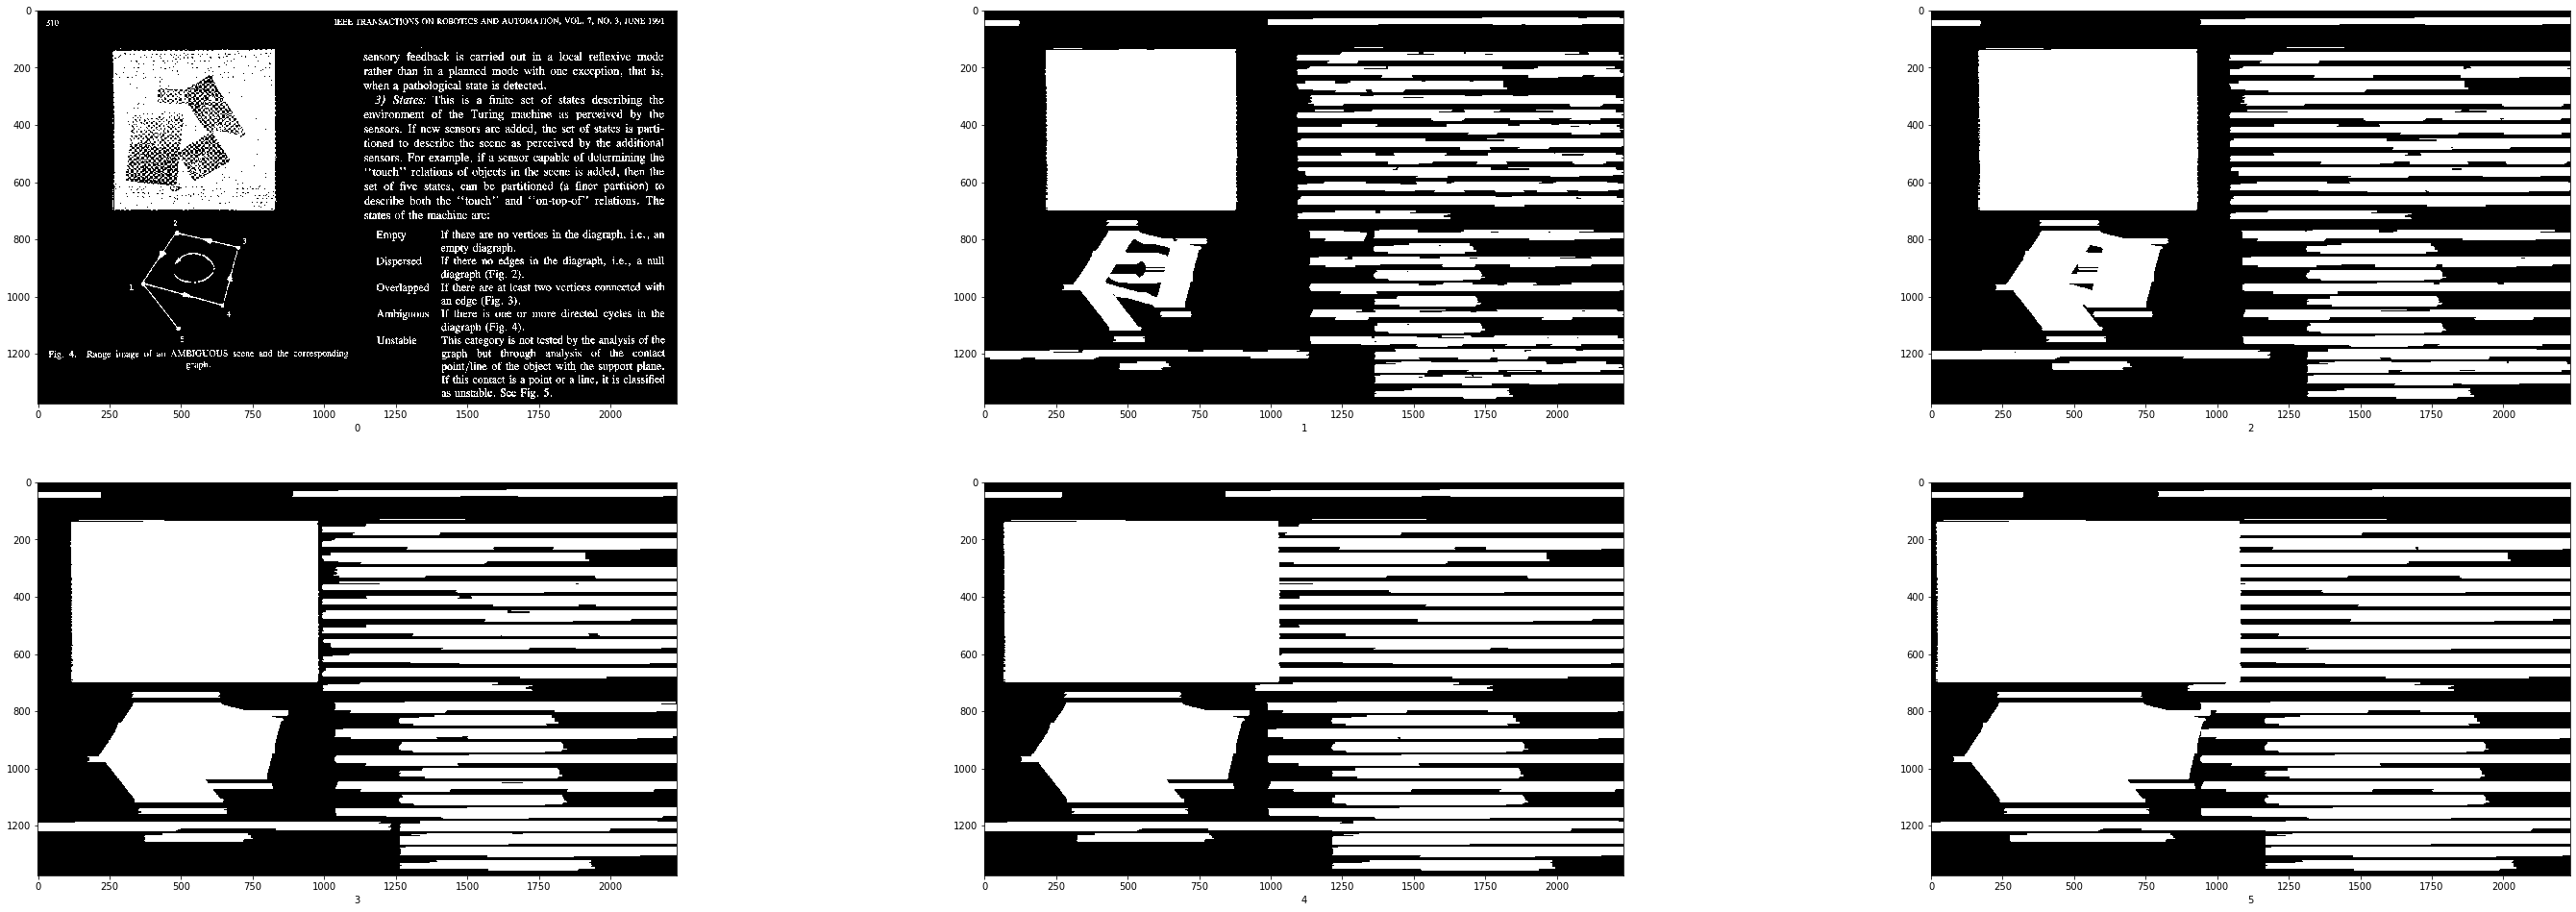

In [16]:
plotAllImages(dilated_k100)

In [17]:
for ite in iterations:
    eroded_k100[ite] = cv.erode(np.copy(dilated_k100[ite]),kernel1_100,iterations = ite)

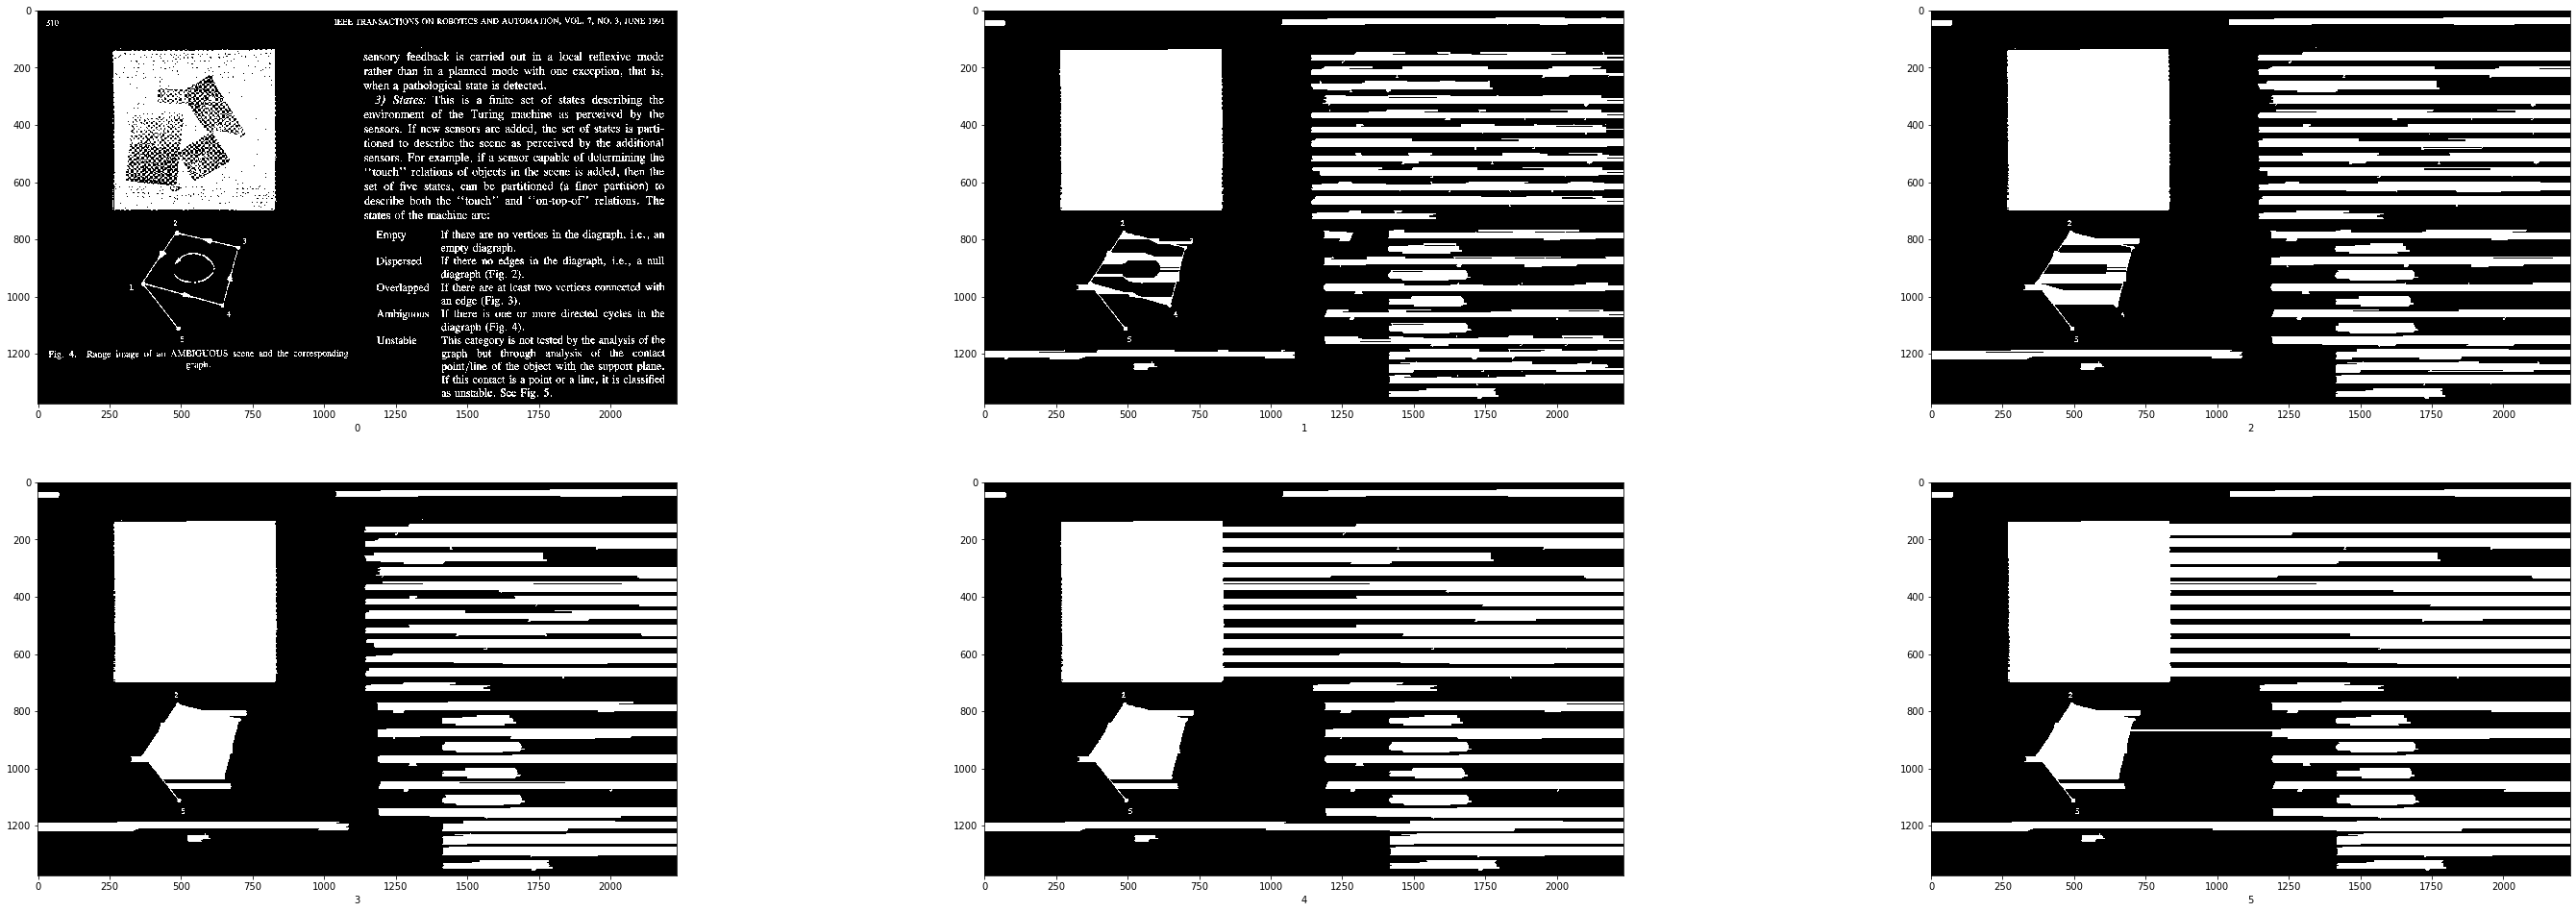

In [18]:
plotAllImages(eroded_k100)

In [19]:
for ite in iterations:
    dilated_k200[ite] = cv.dilate(np.copy(image),kernel200_1,iterations = ite)

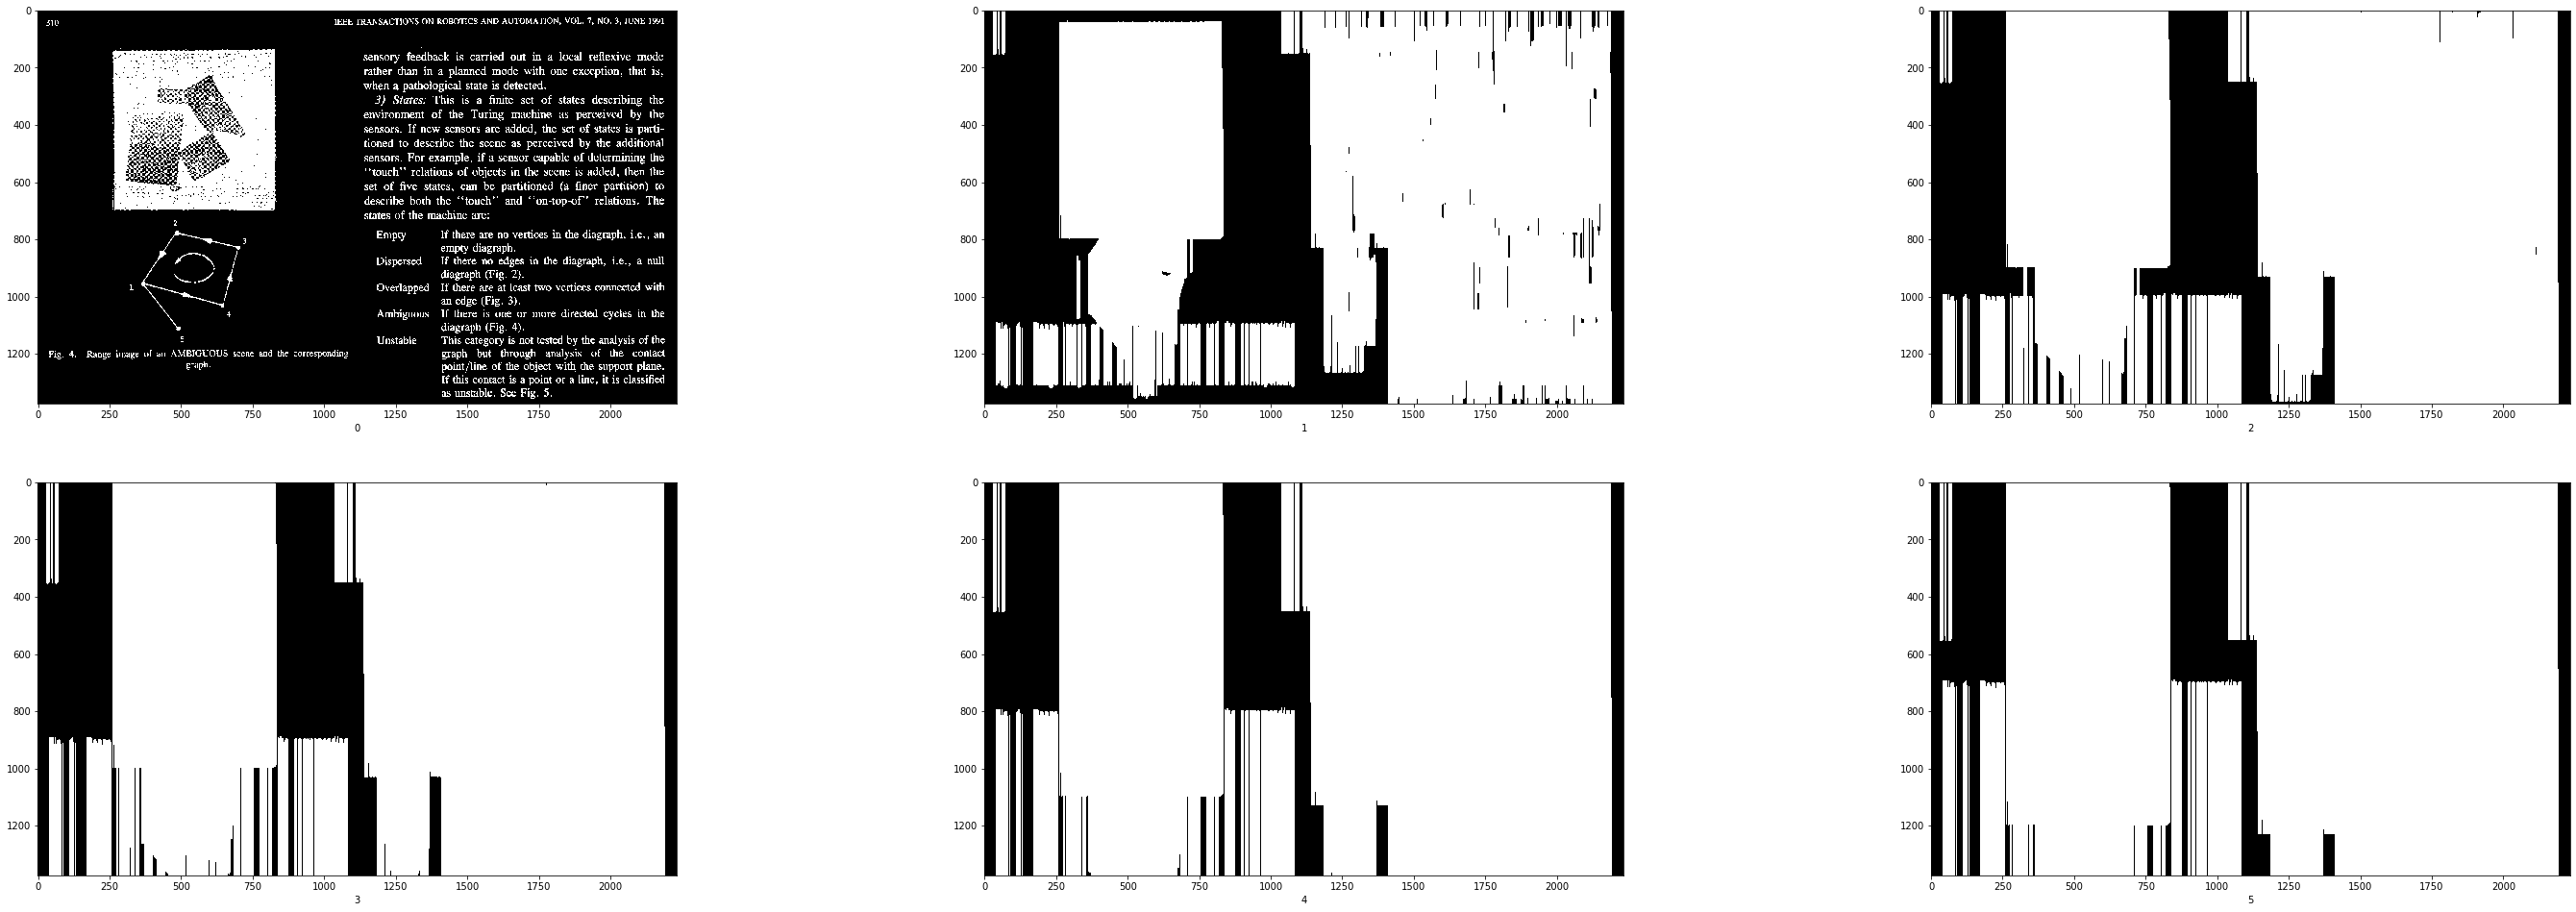

In [20]:
plotAllImages(dilated_k200)

In [21]:
for ite in iterations:
    eroded_k200[ite] = cv.erode(np.copy(dilated_k200[ite]),kernel200_1,iterations = ite)

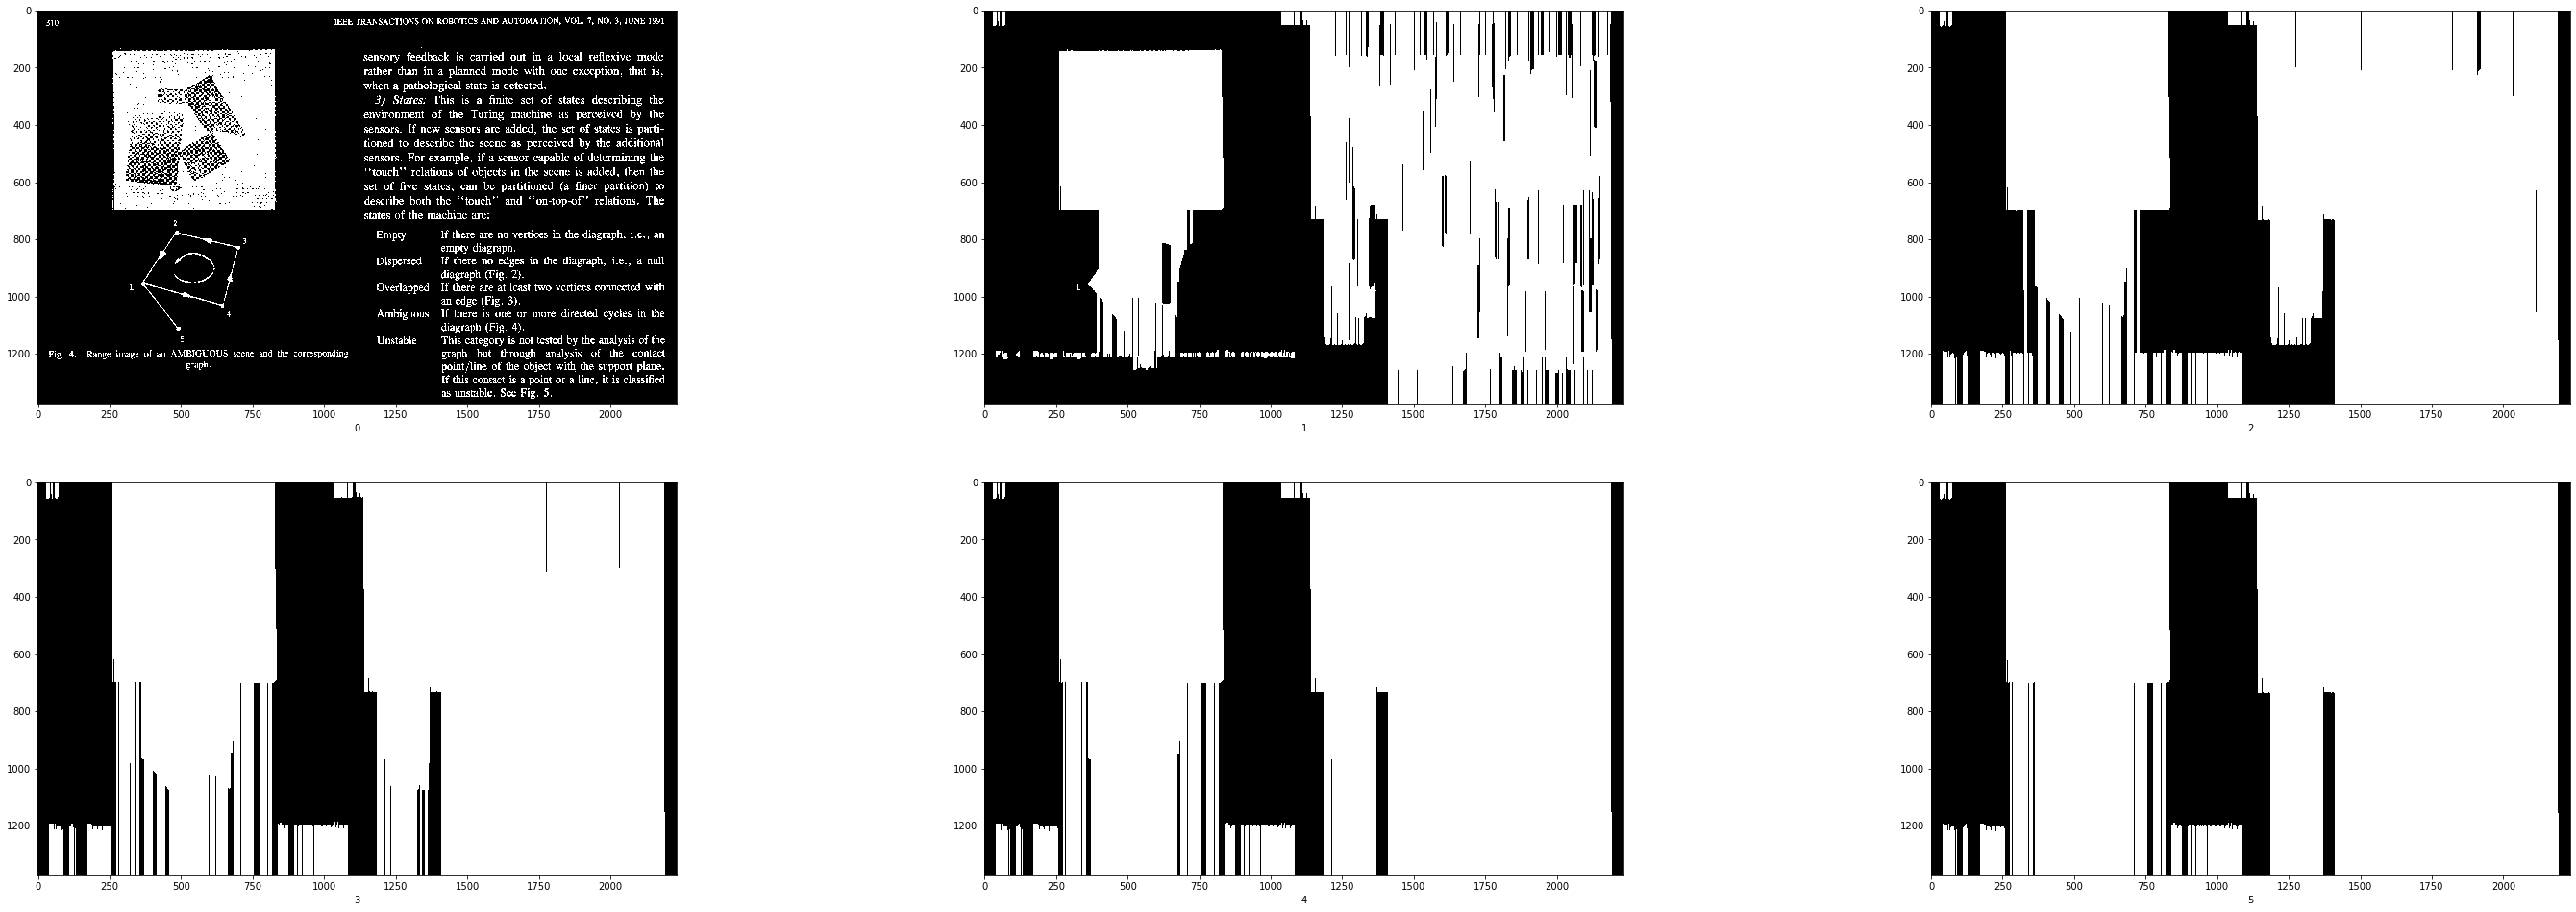

In [22]:
plotAllImages(eroded_k200)

In [23]:
for ite in iterations:
    intesect_images[ite] = cv.bitwise_and(eroded_k100[ite], eroded_k200[ite])

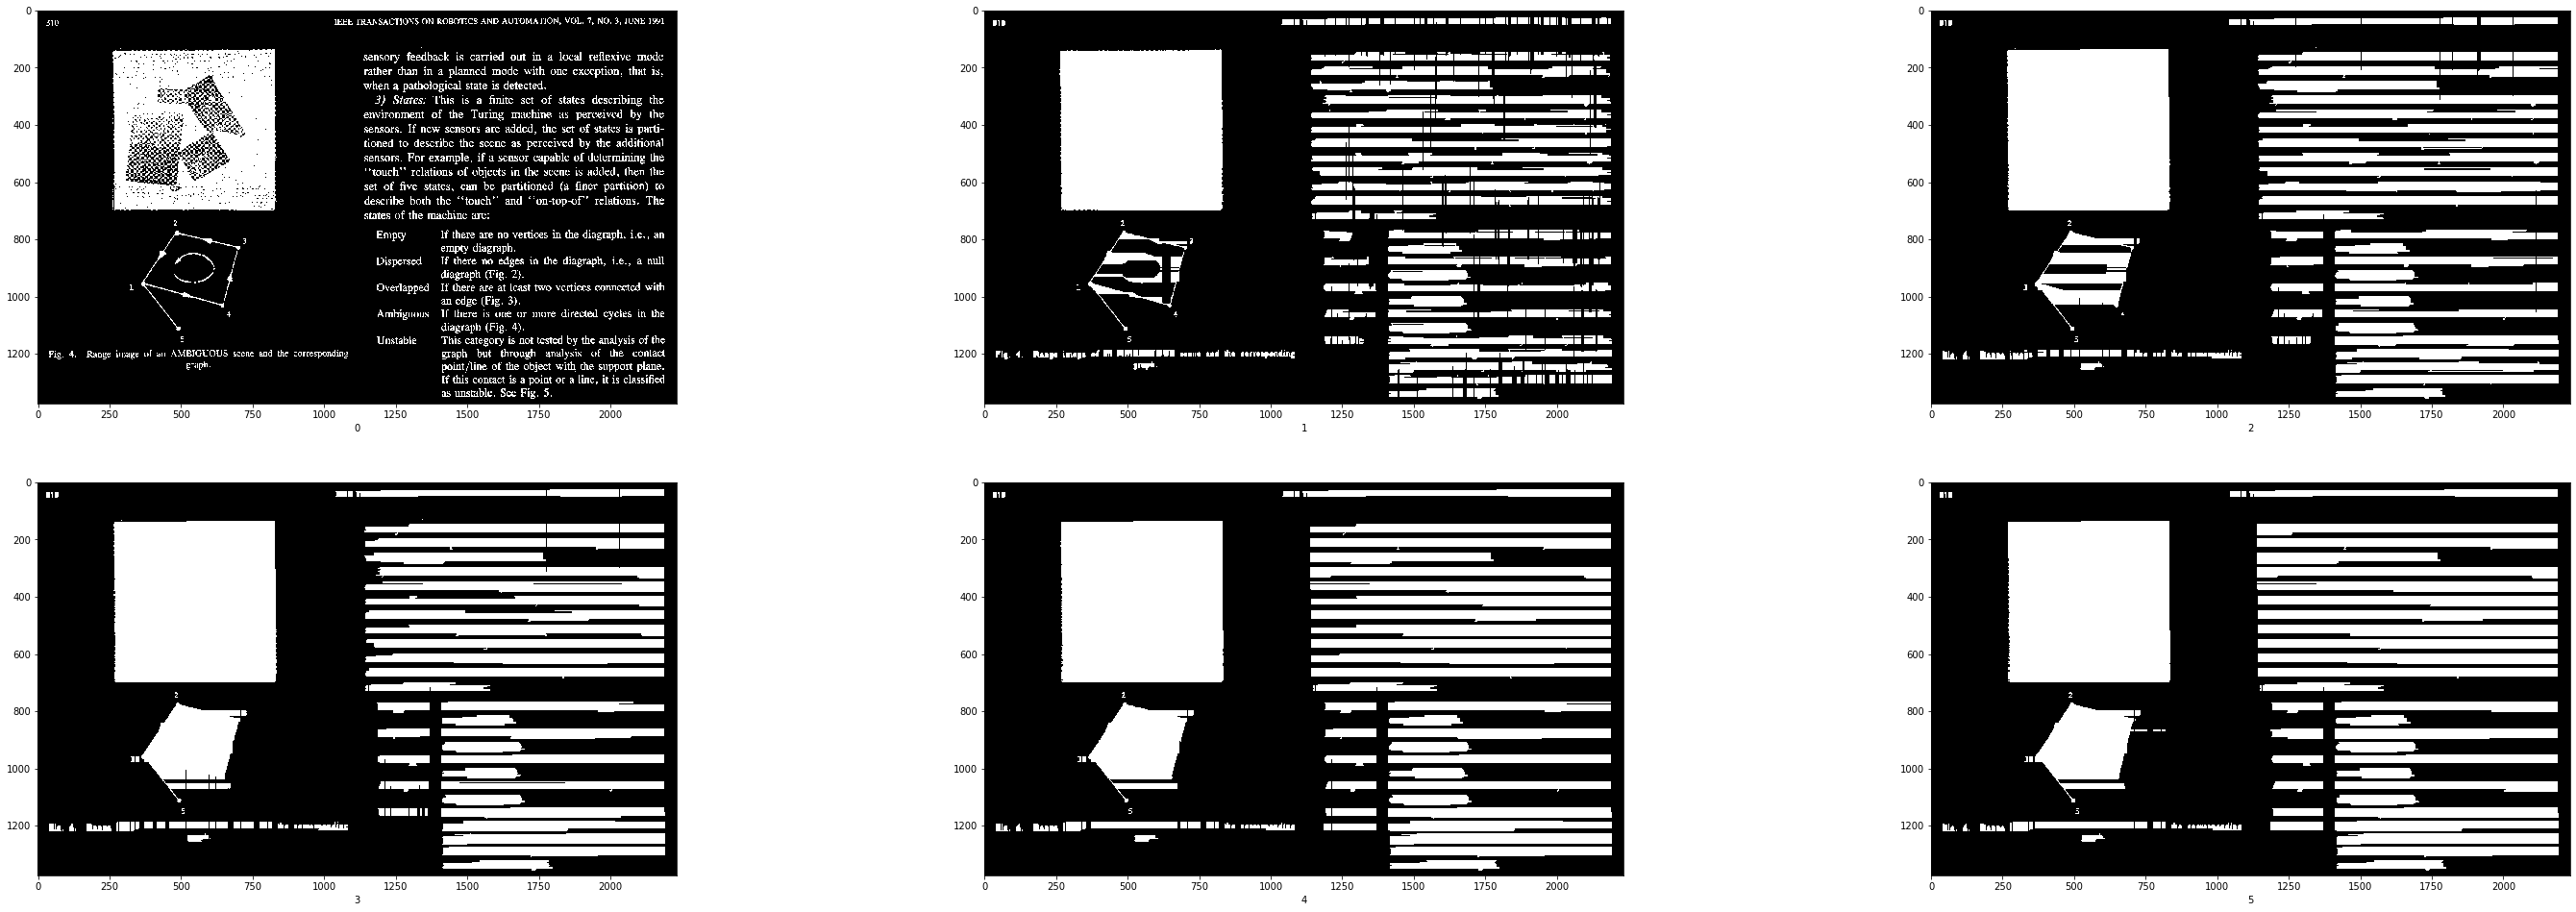

In [24]:
plotAllImages(intesect_images)

In [76]:
for ite in iterations:
    closed_k30[ite] = cv.morphologyEx(np.copy(intesect_images[ite]), cv.MORPH_CLOSE, kernel1_30, anchor=(5,0))

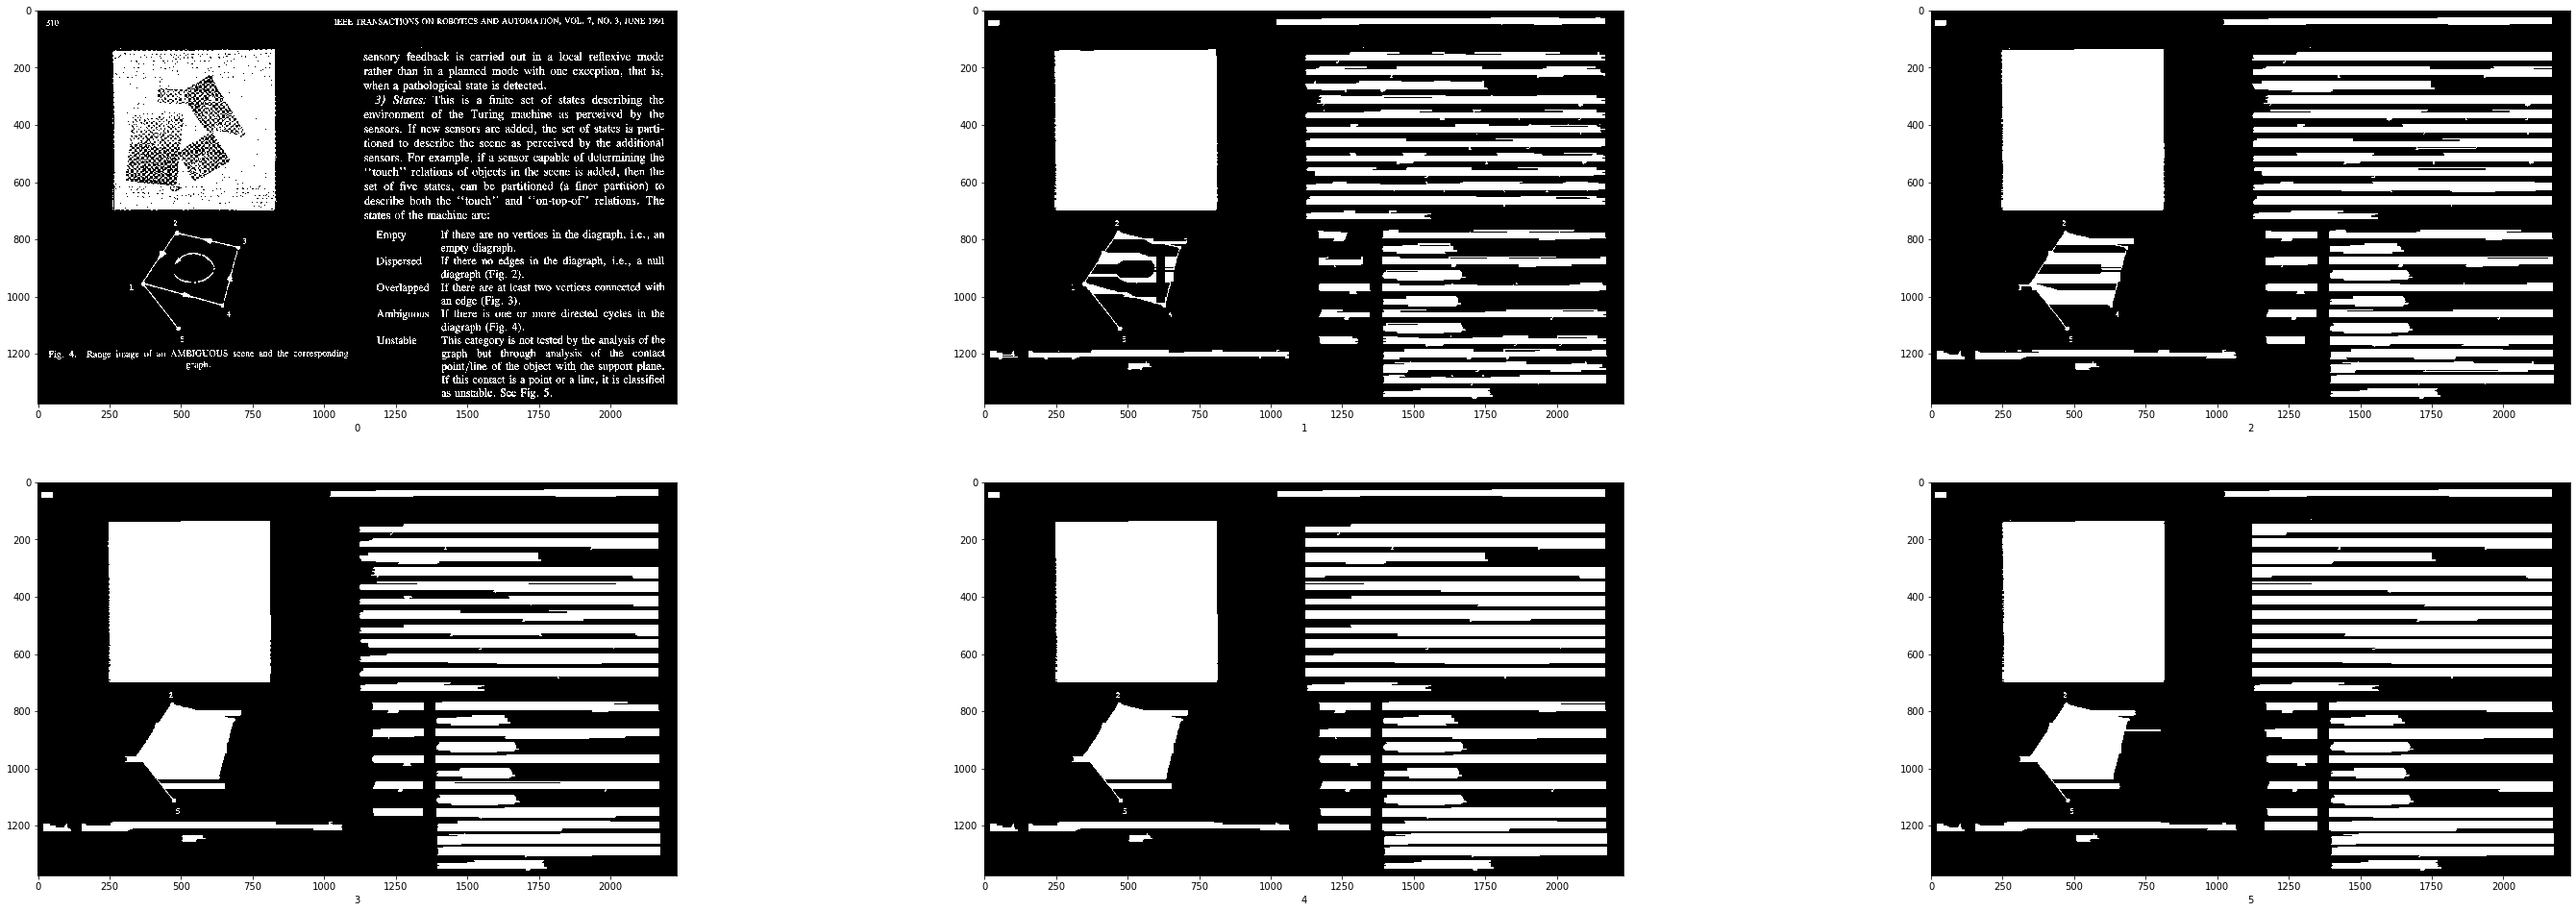

In [77]:
plotAllImages(closed_k30)

#### Etapa 07: Identificação de componentes conexos na imagem da etapa 06

In [78]:
number_of_labels, image_labels, stats, centroids = cv.connectedComponentsWithStats(closed_k30[1])

In [79]:
print(number_of_labels)

54


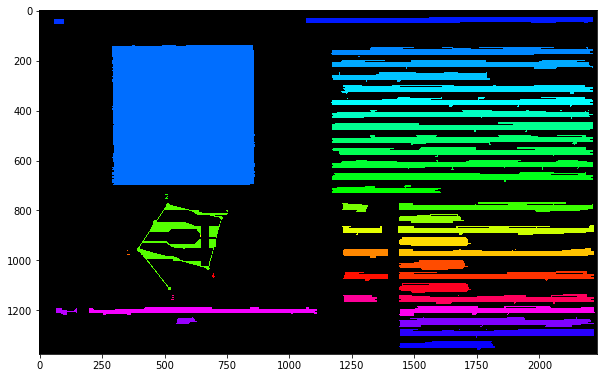

In [67]:
imshow_components(np.copy(image_labels))

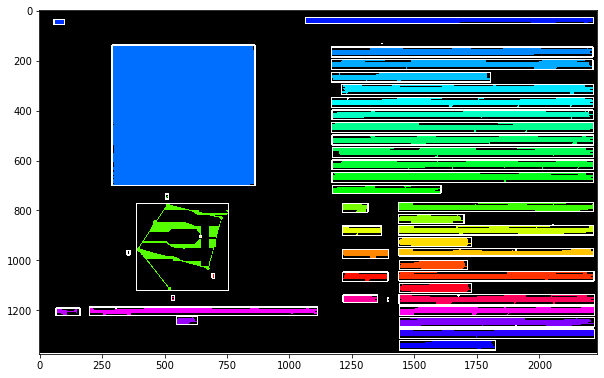

In [68]:
imshow_components_rectagles(np.copy(image_labels),stats)

#### Etapa 8: calcular razões para os componentes conexos obtidos na etapa 7

##### a) Calcular razão entre o número de pixels pretos e o número total de pixels, para cada retângulo envolvendo um componente conexo

In [50]:
black_pixels_ratios={}
black_pixels_amount = {}
component_area = {}

In [51]:
for label, stat in zip(range(number_of_labels),stats):
    black_pixels_ratios[label], black_pixels_amount[label], component_area[label] = getBlackPixelsRate(np.copy(image_p6),stat)

NameError: name 'image_p6' is not defined

In [ ]:
for label in black_pixels_ratios:
    print('L:{}, R:{}, N:{}, A:{}'.format(label,black_pixels_ratios[label], black_pixels_amount[label], component_area[label]))

##### b) Razão entre o número de transições de branco para preto e o número de pixels pretos, para cada retângulo envolvendo um componente conexo

In [ ]:
transition_ratios={}
hor_tran_amount = {}
ver_tran_amount = {}
total_black_amount = {}

In [ ]:
for label, stat in zip(range(number_of_labels),stats):
    transition_ratios[label], hor_tran_amount[label], ver_tran_amount[label], total_black_amount[label] = getTransitionsRate(np.copy(image_p6), stat, black_pixels_amount[label])

In [ ]:
for label in transition_ratios:
    print('L:{}, R:{}, H:{}, V:{}, B:{}'.format(label,transition_ratios[label], hor_tran_amount[label], ver_tran_amount[label], total_black_amount[label]))